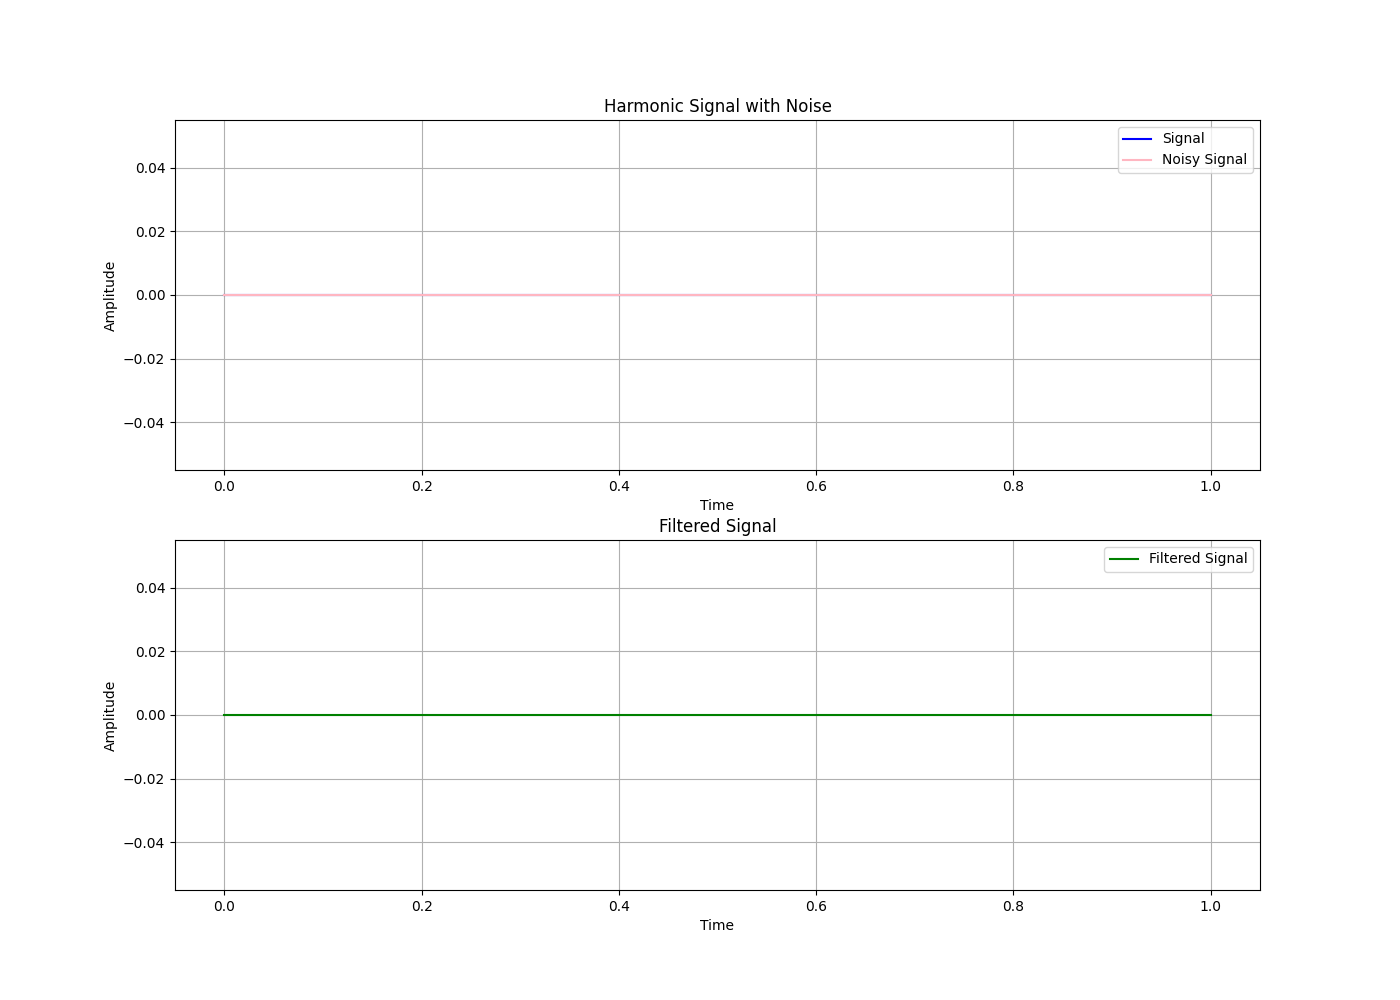

In [4]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.signal import iirfilter, filtfilt

t = np.linspace(0, 1, 1000)
noise = np.random.normal(0, np.sqrt(0.1), len(t))
last_noise_covariance = 0.1
signal = np.zeros_like(t)
noisy_signal = np.zeros_like(t)
original_noisy_signal = np.zeros_like(t)  # Оригінальний зашумлений сигнал
filtered_signal = np.zeros_like(t)
signal_color = 'blue'
noisy_signal_color = 'lightpink'
initial_values = {'amplitude': 1.0, 'frequency': 1.0, 'noise_covariance': 0.1, 'cutoff_freq': 0.1, 'show_noise': True}

def create_plot():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    line_signal, = ax1.plot(t, signal, label='Signal', color=signal_color)
    line_noisy_signal, = ax1.plot(t, noisy_signal, label='Noisy Signal', color=noisy_signal_color)
    line_filtered_signal, = ax2.plot(t, filtered_signal, label='Filtered Signal', color='green')
    ax1.legend()
    ax2.legend()
    ax1.set_xlabel('Time')
    ax2.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.set_ylabel('Amplitude')
    ax1.set_title('Harmonic Signal with Noise')
    ax2.set_title('Filtered Signal')
    ax1.grid(True)
    ax2.grid(True)
    return fig, (ax1, ax2), line_signal, line_noisy_signal, line_filtered_signal

def harmonic_with_noise(t, amplitude, frequency, noise_covariance, show_noise=True, cutoff_freq=0.1):
    global noise, last_noise_covariance, signal, noisy_signal, filtered_signal, signal_color, noisy_signal_color, original_noisy_signal
    
    if noise_covariance != last_noise_covariance:
        noise = np.random.normal(0, np.sqrt(noise_covariance), len(t))
        last_noise_covariance = noise_covariance
    
    signal = amplitude * np.sin(2 * np.pi * frequency * t)
    original_noisy_signal = signal + noise
    
    if show_noise:
        noisy_signal = original_noisy_signal
        noisy_signal_color = 'lightpink'
    else:
        noisy_signal = signal
        noisy_signal_color = signal_color
    
    # Apply filtering to original noisy signal
    b, a = iirfilter(4, cutoff_freq, btype='lowpass', analog=False, ftype='butter')
    filtered_signal = filtfilt(b, a, original_noisy_signal)

# Create sliders for amplitude, frequency, noise covariance, and cutoff frequency
amplitude_slider = widgets.FloatSlider(value=initial_values['amplitude'], min=0.1, max=5.0, step=0.1, description='Amplitude:')
frequency_slider = widgets.FloatSlider(value=initial_values['frequency'], min=0.1, max=5.0, step=0.1, description='Frequency:')
noise_covariance_slider = widgets.FloatSlider(value=initial_values['noise_covariance'], min=0.01, max=1.0, step=0.01, description='Noise Covariance:')
cutoff_freq_slider = widgets.FloatSlider(value=initial_values['cutoff_freq'], min=0.01, max=0.5, step=0.01, description='Cutoff Frequency:')
show_noise_checkbox = widgets.Checkbox(value=initial_values['show_noise'], description='Show Noisy Signal')
reset_button = widgets.Button(description='Reset', tooltip='Reset to initial values', button_style='info')

# Create the plot
fig, (ax1, ax2), line_signal, line_noisy_signal, line_filtered_signal = create_plot()

def update_plot(change):
    amplitude = amplitude_slider.value
    frequency = frequency_slider.value
    noise_covariance = noise_covariance_slider.value
    cutoff_freq = cutoff_freq_slider.value
    show_noise = show_noise_checkbox.value
    
    harmonic_with_noise(t, amplitude, frequency, noise_covariance, show_noise, cutoff_freq)
    
    line_signal.set_ydata(signal)
    line_noisy_signal.set_ydata(noisy_signal)
    line_filtered_signal.set_ydata(filtered_signal)
    
    if show_noise:
        ax1.set_title('Harmonic Signal with Noise')
    else:
        ax1.set_title('Harmonic Signal')
    
    ax1.relim()
    ax1.autoscale_view()
    ax2.relim()
    ax2.autoscale_view()
    line_signal.set_color(signal_color)  # Set signal color
    line_noisy_signal.set_color(noisy_signal_color)  # Set noisy signal color
    fig.canvas.draw()

# Define the reset function
def reset_values(event):
    amplitude_slider.value = initial_values['amplitude']
    frequency_slider.value = initial_values['frequency']
    noise_covariance_slider.value = initial_values['noise_covariance']
    cutoff_freq_slider.value = initial_values['cutoff_freq']
    show_noise_checkbox.value = initial_values['show_noise']
    update_plot(None)

# Connect sliders to update function
amplitude_slider.observe(update_plot, 'value')
frequency_slider.observe(update_plot, 'value')
noise_covariance_slider.observe(update_plot, 'value')
cutoff_freq_slider.observe(update_plot, 'value')
show_noise_checkbox.observe(update_plot, 'value')

# Connect reset button to reset function
reset_button.on_click(reset_values)
reset_button.style.button_color = 'lightblue'
reset_button.layout.margin_left = '20px'

# Display the widgets
display(widgets.VBox([widgets.HBox([amplitude_slider, frequency_slider, noise_covariance_slider, show_noise_checkbox, reset_button]), cutoff_freq_slider]))